In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Input, BatchNormalization, Flatten
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from tensorflow.keras import regularizers

import keras

In [ ]:
data = pd.read_csv("BTC-USD (4).csv")
data.drop(['Date', 'Adj Close', 'Open', 'High', 'Low', 'Volume'], inplace=True, axis=1)
data.drop(len(data) - 2, inplace=True, axis=0)

data

,Close
0,7994.416016
1,8205.167969
2,7884.909180
3,7343.895508
4,7271.208008
...,...
1822,63049.960938
1823,60792.777344
1824,60793.710938
1825,61448.394531


In [ ]:
data = data.iloc[:,0].values

In [ ]:
data = np.reshape(data, (-1,1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,2))
# scaling dataset
data = scaler.fit_transform(data)

data

array([[0.08878307],
       [0.0949714 ],
       [0.08556761],
       ...,
       [1.63913376],
       [1.6583573 ],
       [1.66385083]])

In [ ]:
data_train, data_test = train_test_split(data, test_size=0.2, shuffle = False)
data_train

array([[0.08878307],
       [0.0949714 ],
       [0.08556761],
       ...,
       [0.646869  ],
       [0.64111974],
       [0.6405057 ]])

In [ ]:
division = 75

In [ ]:
x_train = []
y_train = []
for i in range(division, len(data_train)):
    x_train.append(data_train[i-division:i, 0])
    y_train.append(data_train[i, 0])

x_train, y_train

([array([0.08878307, 0.0949714 , 0.08556761, 0.06968178, 0.06754745,
         0.09475181, 0.08831012, 0.08787022, 0.0795528 , 0.08547769,
         0.08857623, 0.09048989, 0.10871474, 0.11260718, 0.11008735,
         0.10831162, 0.09832774, 0.10581619, 0.10550831, 0.11076258,
         0.09508378, 0.08036629, 0.08378593, 0.08372109, 0.09023758,
         0.08760009, 0.07978802, 0.08895671, 0.08682451, 0.09322986,
         0.09572767, 0.10932012, 0.11356432, 0.11814829, 0.12771667,
         0.12071094, 0.12634157, 0.13378918, 0.15191786, 0.16827706,
         0.17278957, 0.17736232, 0.20026009, 0.23623911, 0.18240409,
         0.21835994, 0.20520642, 0.17166743, 0.16479587, 0.17121296,
         0.20526217, 0.18336223, 0.17640384, 0.18316002, 0.19027457,
         0.21479603, 0.22324832, 0.21099511, 0.18756775, 0.2009962 ,
         0.18855778, 0.1551919 , 0.17395583, 0.13233517, 0.13868233,
         0.16724321, 0.16325717, 0.17019882, 0.16526482, 0.15774789,
         0.14475945, 0.14215078, 0

In [ ]:
x_test = []
y_test = []
for i in range(division, len(data_test)):
    x_test.append(data_test[i-division:i, 0])
    y_test.append(data_test[i, 0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1386, 75), (1386,), (291, 75), (291,))

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

In [ ]:
x_train.shape, y_train.shape

((1386, 75, 1), (1386, 1))

In [ ]:
model = Sequential([
    Input(shape=(x_train.shape[1], 1)),

    LSTM(units = 75, activation = "relu"),

    BatchNormalization(),

    Flatten(),

    Dense(100, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)),

    BatchNormalization(),

    Dense(100, activation = 'tanh', kernel_regularizer=regularizers.l2(0.0001)),

    BatchNormalization(),

    Dense(100, activation = 'sigmoid', kernel_regularizer=regularizers.l2(0.00001)),

    BatchNormalization(),

    Dense(100, activation = 'tanh', kernel_regularizer=regularizers.l2(0.00001)),

    BatchNormalization(),

    Dense(1)
])

model.compile(optimizer = "adam",
         loss = "mean_squared_error", metrics = ["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs = 40, batch_size = 5)
model.evaluate(x_test, y_test, batch_size = 5)
model.summary()

Epoch 1/40
278/278 [==============================] - 15s 37ms/step - loss: 0.1716 - accuracy: 7.2150e-04
Epoch 2/40
278/278 [==============================] - 10s 36ms/step - loss: 0.0905 - accuracy: 7.2150e-04
Epoch 3/40
278/278 [==============================] - 9s 33ms/step - loss: 0.0741 - accuracy: 7.2150e-04
Epoch 4/40
278/278 [==============================] - 10s 37ms/step - loss: 0.0793 - accuracy: 7.2150e-04
Epoch 5/40
278/278 [==============================] - 10s 37ms/step - loss: 0.0787 - accuracy: 0.0000e+00
Epoch 6/40
278/278 [==============================] - 9s 33ms/step - loss: 0.0741 - accuracy: 7.2150e-04
Epoch 7/40
278/278 [==============================] - 10s 38ms/step - loss: 0.0806 - accuracy: 7.2150e-04
Epoch 8/40
278/278 [==============================] - 11s 38ms/step - loss: 0.0732 - accuracy: 7.2150e-04
Epoch 9/40
278/278 [==============================] - 10s 35ms/step - loss: 0.0811 - accuracy: 7.2150e-04
Epoch 10/40
278/278 [===========================

In [ ]:
d = []
for i in range(len(x_train)):
  prediction = model.predict(x_train[i]).astype("float64")[division-1]
  d.append(prediction)
  print(y_train[i-1], prediction, y_train[i-1][0] - prediction[0])

3/3 [==============================] - 0s 5ms/step
[0.6405057] [0.05157452] 0.5889311770989364
3/3 [==============================] - 0s 5ms/step
[0.13454382] [0.05176545] 0.0827783718372068
3/3 [==============================] - 0s 5ms/step
[0.13355385] [0.05167981] 0.08187403665847123
3/3 [==============================] - 0s 6ms/step
[0.13614597] [0.0519046] 0.08424137729875322
3/3 [==============================] - 0s 4ms/step
[0.15018753] [0.05315111] 0.09703641762387569
3/3 [==============================] - 0s 4ms/step
[0.15940874] [0.05398803] 0.1054207099215029
3/3 [==============================] - 0s 4ms/step
[0.16288844] [0.05430963] 0.10857881183254778
3/3 [==============================] - 0s 4ms/step
[0.17180166] [0.05514889] 0.11665276760281548
3/3 [==============================] - 0s 5ms/step
[0.17616085] [0.0555714] 0.1205894465745975
3/3 [==============================] - 0s 4ms/step
[0.20069279] [0.05863852] 0.1420542735648779
3/3 [==============================] -

In [ ]:
d2 = []
for i in range(len(x_test)):
  prediction = model.predict(x_test[i]).astype("float64")[division-1]
  d2.append(prediction)
  print(y_test[i-1], prediction, y_test[i-1][0] - prediction[0])

3/3 [==============================] - 0s 5ms/step
[1.66385083] [0.26907471] 1.3947761265678362
3/3 [==============================] - 0s 5ms/step
[0.71494607] [0.27216688] 0.4427791966550073
3/3 [==============================] - 0s 5ms/step
[0.71605224] [0.27324858] 0.44280365438913116
3/3 [==============================] - 0s 5ms/step
[0.71365593] [0.27091101] 0.4427449255536262
3/3 [==============================] - 0s 5ms/step
[0.7123288] [0.26962528] 0.4427035257511085
3/3 [==============================] - 0s 5ms/step
[0.72541362] [0.28258371] 0.4428299028634246
3/3 [==============================] - 0s 4ms/step
[0.71003401] [0.26741722] 0.44261678515062264
3/3 [==============================] - 0s 4ms/step
[0.71081861] [0.26816991] 0.4426487002543984
3/3 [==============================] - 0s 5ms/step
[0.70774759] [0.26523611] 0.442511476342651
3/3 [==============================] - 0s 6ms/step
[0.706809] [0.26434618] 0.44246281675481614
3/3 [==============================] - 0s

Text(0.5, 1.0, 'LSTM')

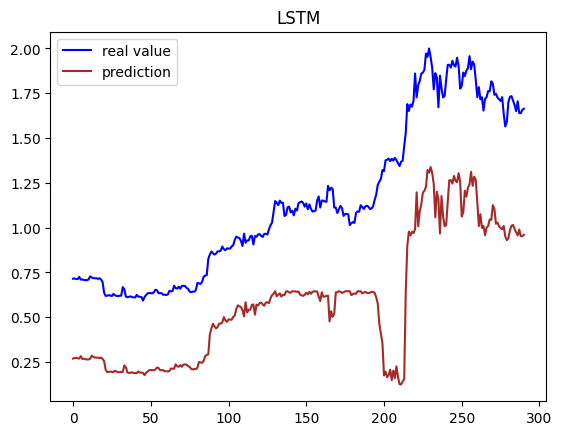

In [ ]:
#Plot for LSTM predictions
plt.plot(y_test, label = "real value", color = "b")
plt.plot(d2, label = "prediction", color = "brown")
plt.legend()
plt.title("LSTM")

Text(0.5, 1.0, 'LSTM')

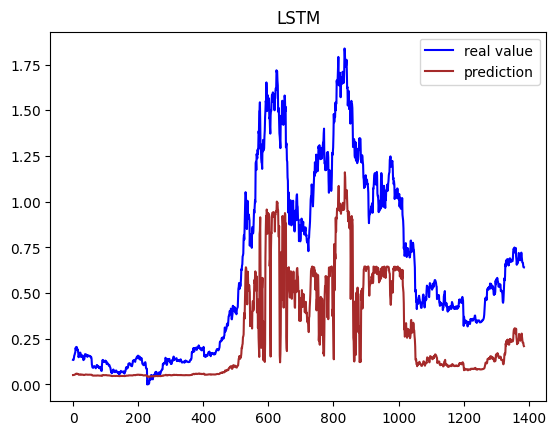

In [ ]:
#Plot for LSTM predictions
plt.plot(y_train, label = "real value", color = "b")
plt.plot(d, label = "prediction", color = "brown")
plt.legend()
plt.title("LSTM")

In [ ]:
h = "Bitcoin Model"

model.save(h)

nn = keras.models.load_model(h)

nn.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x79e155f8f5b0>>